In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
conso = pd.read_excel (r'C:\Users\useal\Projet9\conso2.xlsx' )

In [3]:
pd.set_option('display.max_rows', None)

# Préprocessing 

## Nettoyage du dataframe de consommation

In [4]:
conso

,Mois,Qualité,Territoire,Production totale,Production nucléaire,Production thermique totale,Production thermique charbon,Production thermique fioul,Production thermique gaz,Production hydraulique,...,Production bioénergies,Consommation totale,Solde exportateur,Echanges export,Echanges import,Echanges avec le Royaume-Uni,Echanges avec l'Espagne,Echanges avec l'Italie,Echanges avec la Suisse,Echanges avec l'Allemagne et la Belgique
0,2012-01,Données définitives,France,57177,42811.0,5399,741.0,691.0,3967,6741.0,...,514,51086,5371.0,7043.0,1672.0,929.0,724.0,1581.0,2195.0,-59.0
1,2012-02,Données définitives,France,54419,38661.0,8721,2511.0,1309.0,4901,5244.0,...,454,54476,-715.0,4504.0,5220.0,-798.0,-309.0,1244.0,1579.0,-2430.0
2,2012-03,Données définitives,France,48583,37549.0,5276,1435.0,666.0,3175,3894.0,...,531,43156,4888.0,7042.0,2153.0,583.0,330.0,1742.0,2235.0,-1.0
3,2012-04,Données définitives,France,44192,33100.0,3484,1655.0,486.0,1343,5302.0,...,405,40176,3447.0,5762.0,2314.0,547.0,-9.0,1271.0,1670.0,-31.0
4,2012-05,Données définitives,France,40433,29058.0,1772,854.0,368.0,549,7706.0,...,469,35257,4425.0,6391.0,1965.0,693.0,251.0,1341.0,1060.0,1079.0
5,2012-06,Données définitives,France,37518,26562.0,2219,960.0,384.0,875,6823.0,...,437,33219,3648.0,5674.0,2026.0,447.0,482.0,1207.0,599.0,913.0
6,2012-07,Données définitives,France,37910,28818.0,2221,1110.0,437.0,674,4901.0,...,513,34141,3216.0,5327.0,2110.0,822.0,494.0,825.0,787.0,287.0
7,2012-08,Données définitives,France,36339,28314.0,2533,1165.0,413.0,956,3563.0,...,486,32247,3561.0,5834.0,2273.0,948.0,334.0,610.0,792.0,877.0
8,2012-09,Données définitives,France,38035,30130.0,2450,1382.0,396.0,671,3641.0,...,470,33269,4054.0,6036.0,1981.0,1011.0,72.0,790.0,1413.0,769.0
9,2012-10,Données définitives,France,42987,32848.0,3518,2039.0,456.0,1022,4534.0,...,450,38628,3625.0,6387.0,2762.0,183.0,-273.0,1621.0,1774.0,321.0


In [130]:
conso.shape

(1377, 22)

On ne garde que les données nationales. 

In [5]:
consof = conso[conso['Territoire'] == 'France']
consof

,Mois,Qualité,Territoire,Production totale,Production nucléaire,Production thermique totale,Production thermique charbon,Production thermique fioul,Production thermique gaz,Production hydraulique,...,Production bioénergies,Consommation totale,Solde exportateur,Echanges export,Echanges import,Echanges avec le Royaume-Uni,Echanges avec l'Espagne,Echanges avec l'Italie,Echanges avec la Suisse,Echanges avec l'Allemagne et la Belgique
0,2012-01,Données définitives,France,57177,42811.0,5399,741.0,691.0,3967,6741.0,...,514,51086,5371.0,7043.0,1672.0,929.0,724.0,1581.0,2195.0,-59.0
1,2012-02,Données définitives,France,54419,38661.0,8721,2511.0,1309.0,4901,5244.0,...,454,54476,-715.0,4504.0,5220.0,-798.0,-309.0,1244.0,1579.0,-2430.0
2,2012-03,Données définitives,France,48583,37549.0,5276,1435.0,666.0,3175,3894.0,...,531,43156,4888.0,7042.0,2153.0,583.0,330.0,1742.0,2235.0,-1.0
3,2012-04,Données définitives,France,44192,33100.0,3484,1655.0,486.0,1343,5302.0,...,405,40176,3447.0,5762.0,2314.0,547.0,-9.0,1271.0,1670.0,-31.0
4,2012-05,Données définitives,France,40433,29058.0,1772,854.0,368.0,549,7706.0,...,469,35257,4425.0,6391.0,1965.0,693.0,251.0,1341.0,1060.0,1079.0
5,2012-06,Données définitives,France,37518,26562.0,2219,960.0,384.0,875,6823.0,...,437,33219,3648.0,5674.0,2026.0,447.0,482.0,1207.0,599.0,913.0
6,2012-07,Données définitives,France,37910,28818.0,2221,1110.0,437.0,674,4901.0,...,513,34141,3216.0,5327.0,2110.0,822.0,494.0,825.0,787.0,287.0
7,2012-08,Données définitives,France,36339,28314.0,2533,1165.0,413.0,956,3563.0,...,486,32247,3561.0,5834.0,2273.0,948.0,334.0,610.0,792.0,877.0
8,2012-09,Données définitives,France,38035,30130.0,2450,1382.0,396.0,671,3641.0,...,470,33269,4054.0,6036.0,1981.0,1011.0,72.0,790.0,1413.0,769.0
9,2012-10,Données définitives,France,42987,32848.0,3518,2039.0,456.0,1022,4534.0,...,450,38628,3625.0,6387.0,2762.0,183.0,-273.0,1621.0,1774.0,321.0


Et on ne garde que les colonnes qui nous interesse. 

In [6]:
consofc = consof[['Mois','Territoire', 'Consommation totale']]

In [7]:
consofc

,Mois,Territoire,Consommation totale
0,2012-01,France,51086
1,2012-02,France,54476
2,2012-03,France,43156
3,2012-04,France,40176
4,2012-05,France,35257
5,2012-06,France,33219
6,2012-07,France,34141
7,2012-08,France,32247
8,2012-09,France,33269
9,2012-10,France,38628


Afin de travailler sur les données temporelles nous mettons les dates en index. 

In [8]:
consofc = consofc.set_index('Mois')

In [9]:
consofc.shape

(117, 2)

In [10]:
consofc.index

Index(['2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06',
       '2012-07', '2012-08', '2012-09', '2012-10',
       ...
       '2020-12', '2021-01', '2021-02', '2021-03', '2021-04', '2021-05',
       '2021-06', '2021-07', '2021-08', '2021-09'],
      dtype='object', name='Mois', length=117)

In [11]:
consofc.shape

(117, 2)

## Nettoyage et création des dataframes de  DJU 

Afin de corriger les données de l'effet température nous allons utiliser les données téléchargées des DJU.

In [12]:
h1a = pd.read_excel (r'C:\Users\useal\Projet9\h1a.xlsx' )
h1b = pd.read_excel (r'C:\Users\useal\Projet9\h1b.xlsx' )
h1c = pd.read_excel (r'C:\Users\useal\Projet9\h1c.xlsx' )
h2a = pd.read_excel (r'C:\Users\useal\Projet9\h2a.xlsx' )
h2b = pd.read_excel (r'C:\Users\useal\Projet9\h2b.xlsx' )
h2c = pd.read_excel (r'C:\Users\useal\Projet9\h2c.xlsx' )
h2d = pd.read_excel (r'C:\Users\useal\Projet9\h2d.xlsx' )
h3 = pd.read_excel (r'C:\Users\useal\Projet9\h3.xlsx' )

Nous visualisons l'un des dataframes afin de voir la structure ( modifiée en amont directement sur excel). 

In [13]:
h1a

,Unnamed: 0,JAN,FÉV,MAR,AVR,MAI,JUN,JUI,AOÛ,SEP,OCT,NOV,DÉC
0,2021,445.8,347.1,326.8,318.8,192.7,29.8,0.0,0.0,0.0,0.0,0.0,0.0
1,2020,366.7,287.9,325.8,181.5,152.9,68.7,47.4,26.8,76.9,175.9,268.8,361.4
2,2019,437.5,319.1,273.2,237.1,179.1,62.5,45.2,39.5,84.1,161.8,314.1,361.9
3,2018,390.2,450.4,363.5,170.5,123.1,56.3,17.0,38.5,99.6,180.2,316.3,350.9
4,2017,498.4,320.2,251.8,258.4,127.2,40.1,34.1,41.4,100.2,142.0,318.4,490.0
5,2016,388.9,352.2,357.8,268.4,148.4,65.1,37.1,40.1,48.9,219.0,330.8,438.1
6,2015,418.8,400.8,331.5,218.7,153.7,77.7,40.9,39.7,131.0,220.6,223.9,257.6
7,2014,351.9,303.3,291.4,195.3,155.1,80.2,36.8,61.2,75.4,136.5,262.0,398.2
8,2013,472.7,441.7,446.0,273.7,210.1,90.6,31.9,43.0,96.1,150.3,329.1,374.5
9,2012,374.1,473.3,280.6,288.5,160.4,88.6,57.1,41.3,109.6,201.5,315.2,377.8


L'ensemble des actions sur ces 8 dataframes seront effectuées en même temps dans un souci d'efficacité. L'idée est de grouper ces 8 dataframes contenant chacun les données d'une ville au centre de chacune des zones du pays et d'en faire la moyenne afin d'avoir une estimation du DJU moyen en France.

In [14]:
h1a = h1a.set_index('Unnamed: 0')
h1b = h1b.set_index('Unnamed: 0')
h1c = h1c.set_index('Unnamed: 0')
h2a = h2a.set_index('Unnamed: 0')
h2b = h2b.set_index('Unnamed: 0')
h2c = h2c.set_index('Unnamed: 0')
h2d = h2d.set_index('Unnamed: 0')
h3 = h3.set_index('Unnamed: 0')

In [15]:
h3

,JAN,FÉV,MAR,AVR,MAI,JUN,JUI,AOÛ,SEP,OCT,NOV,DÉC
Unnamed: 0,,,,,,,,,,,,
2021,336.1,193.7,222.0,179.2,90.9,8.4,0.0,0.0,0.0,0.0,0.0,0.0
2020,250.1,201.5,206.7,127.0,45.0,21.7,3.4,3.4,31.4,113.2,137.7,298.9
2019,352.4,226.1,189.4,147.6,98.0,21.1,1.0,1.6,14.9,47.9,212.1,211.1
2018,220.0,337.8,234.1,100.2,66.6,13.8,1.1,3.5,13.9,68.3,151.4,253.1
2017,345.5,205.1,170.3,143.5,72.2,9.9,3.0,4.2,53.2,66.3,217.9,341.8
2016,275.4,240.5,235.9,123.0,76.3,15.4,4.4,5.6,19.9,91.6,185.5,240.0
2015,294.2,303.8,206.5,134.6,54.7,10.0,0.8,6.2,31.6,101.7,164.8,200.2
2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123.8,270.0
2013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Je change les noms des colonnes dans le but final d'obtenir une structure me permettant de faire une simple jointure avec le premier dataframe de base. 

In [16]:
h1a.rename(columns={'JAN':'01','FÉV':'02','MAR':'03','AVR':'04','MAI':'05','JUN':'06','JUI':'07','AOÛ':'08','SEP':'09','OCT':'10','NOV':'11','DÉC':'12'}, inplace=True)
h1b.rename(columns={'JAN':'01','FÉV':'02','MAR':'03','AVR':'04','MAI':'05','JUN':'06','JUI':'07','AOÛ':'08','SEP':'09','OCT':'10','NOV':'11','DÉC':'12'}, inplace=True)
h1c.rename(columns={'JAN':'01','FÉV':'02','MAR':'03','AVR':'04','MAI':'05','JUN':'06','JUI':'07','AOÛ':'08','SEP':'09','OCT':'10','NOV':'11','DÉC':'12'}, inplace=True)
h2a.rename(columns={'JAN':'01','FÉV':'02','MAR':'03','AVR':'04','MAI':'05','JUN':'06','JUI':'07','AOÛ':'08','SEP':'09','OCT':'10','NOV':'11','DÉC':'12'}, inplace=True)
h2b.rename(columns={'JAN':'01','FÉV':'02','MAR':'03','AVR':'04','MAI':'05','JUN':'06','JUI':'07','AOÛ':'08','SEP':'09','OCT':'10','NOV':'11','DÉC':'12'}, inplace=True)
h2c.rename(columns={'JAN':'01','FÉV':'02','MAR':'03','AVR':'04','MAI':'05','JUN':'06','JUI':'07','AOÛ':'08','SEP':'09','OCT':'10','NOV':'11','DÉC':'12'}, inplace=True)
h2d.rename(columns={'JAN':'01','FÉV':'02','MAR':'03','AVR':'04','MAI':'05','JUN':'06','JUI':'07','AOÛ':'08','SEP':'09','OCT':'10','NOV':'11','DÉC':'12'}, inplace=True)
h3.rename(columns={'JAN':'01','FÉV':'02','MAR':'03','AVR':'04','MAI':'05','JUN':'06','JUI':'07','AOÛ':'08','SEP':'09','OCT':'10','NOV':'11','DÉC':'12'}, inplace=True)

In [17]:
h1a

,01,02,03,04,05,06,07,08,09,10,11,12
Unnamed: 0,,,,,,,,,,,,
2021,445.8,347.1,326.8,318.8,192.7,29.8,0.0,0.0,0.0,0.0,0.0,0.0
2020,366.7,287.9,325.8,181.5,152.9,68.7,47.4,26.8,76.9,175.9,268.8,361.4
2019,437.5,319.1,273.2,237.1,179.1,62.5,45.2,39.5,84.1,161.8,314.1,361.9
2018,390.2,450.4,363.5,170.5,123.1,56.3,17.0,38.5,99.6,180.2,316.3,350.9
2017,498.4,320.2,251.8,258.4,127.2,40.1,34.1,41.4,100.2,142.0,318.4,490.0
2016,388.9,352.2,357.8,268.4,148.4,65.1,37.1,40.1,48.9,219.0,330.8,438.1
2015,418.8,400.8,331.5,218.7,153.7,77.7,40.9,39.7,131.0,220.6,223.9,257.6
2014,351.9,303.3,291.4,195.3,155.1,80.2,36.8,61.2,75.4,136.5,262.0,398.2
2013,472.7,441.7,446.0,273.7,210.1,90.6,31.9,43.0,96.1,150.3,329.1,374.5


In [18]:
h1a = h1a.unstack()
h1b = h1b.unstack()
h1c = h1c.unstack()
h2a = h2a.unstack()
h2b = h2b.unstack()
h2c = h2c.unstack()
h2d = h2d.unstack()
h3 = h3.unstack()

In [19]:
h1a

    Unnamed: 0
01  2021          445.8
    2020          366.7
    2019          437.5
    2018          390.2
    2017          498.4
    2016          388.9
    2015          418.8
    2014          351.9
    2013          472.7
    2012          374.1
02  2021          347.1
    2020          287.9
    2019          319.1
    2018          450.4
    2017          320.2
    2016          352.2
    2015          400.8
    2014          303.3
    2013          441.7
    2012          473.3
03  2021          326.8
    2020          325.8
    2019          273.2
    2018          363.5
    2017          251.8
    2016          357.8
    2015          331.5
    2014          291.4
    2013          446.0
    2012          280.6
04  2021          318.8
    2020          181.5
    2019          237.1
    2018          170.5
    2017          258.4
    2016          268.4
    2015          218.7
    2014          195.3
    2013          273.7
    2012          288.5
05  2021          192.7
 

In [20]:
h1a.shape

(120,)

Ici sauver les résultats de boucles for dans des listes vides permet de structurer les données dans le format de date adéquat pour la jointure.

In [21]:
l1a = []
l1b = []
l1c = []
l2a = []
l2b = []
l2c = []
l2d = []
l3 = []

In [22]:
for a, b in zip(h1a.index.to_numpy(), h1a.to_numpy()):
    l1a.append((a,b))

In [23]:
for a, b in zip(h1b.index.to_numpy(), h1b.to_numpy()):
    l1b.append((a,b))

In [24]:
for a, b in zip(h1c.index.to_numpy(), h1c.to_numpy()):
    l1c.append((a,b))

In [25]:
for a, b in zip(h2a.index.to_numpy(), h2a.to_numpy()):
    l2a.append((a,b))

In [26]:
for a, b in zip(h2b.index.to_numpy(), h2b.to_numpy()):
    l2b.append((a,b))

In [27]:
for a, b in zip(h2c.index.to_numpy(), h2c.to_numpy()):
    l2c.append((a,b))

In [28]:
for a, b in zip(h2d.index.to_numpy(), h2d.to_numpy()):
    l2d.append((a,b))

In [29]:
for a, b in zip(h3.index.to_numpy(), h3.to_numpy()):
    l3.append((a,b))

In [30]:
l2d

[(('01', 2021), 424.3),
 (('01', 2020), 375.8),
 (('01', 2019), 414.9),
 (('01', 2018), 316.7),
 (('01', 2017), 442.5),
 (('01', 2016), 387.2),
 (('01', 2015), 383.7),
 (('01', 2014), 372.7),
 (('01', 2013), 402.1),
 (('01', 2012), 366.3),
 (('02', 2021), 286.1),
 (('02', 2020), 280.5),
 (('02', 2019), 288.6),
 (('02', 2018), 383.7),
 (('02', 2017), 273.3),
 (('02', 2016), 311.4),
 (('02', 2015), 361.9),
 (('02', 2014), 323.4),
 (('02', 2013), 407.6),
 (('02', 2012), 437.3),
 (('03', 2021), 284.7),
 (('03', 2020), 270.1),
 (('03', 2019), 248.5),
 (('03', 2018), 314.3),
 (('03', 2017), 222.3),
 (('03', 2016), 290.2),
 (('03', 2015), 253.7),
 (('03', 2014), 260.3),
 (('03', 2013), 316.0),
 (('03', 2012), 223.9),
 (('04', 2021), 228.1),
 (('04', 2020), 166.6),
 (('04', 2019), 205.1),
 (('04', 2018), 147.6),
 (('04', 2017), 173.8),
 (('04', 2016), 166.7),
 (('04', 2015), 164.6),
 (('04', 2014), 149.0),
 (('04', 2013), 195.8),
 (('04', 2012), 210.8),
 (('05', 2021), 136.4),
 (('05', 2020), 

In [31]:
l1a2 = []
l1b2 = []
l1c2 = []
l2a2 = []
l2b2 = []
l2c2 = []
l2d2 = []
l32 = []

In [32]:
for a , b in l1a:
    d = str(a[1])
    c = d+'-'+a[0]
    l1a2.append((c,b))

In [33]:
for a , b in l1b:
    d = str(a[1])
    c = d+'-'+a[0]
    l1b2.append((c,b))

In [34]:
for a , b in l1c:
    d = str(a[1])
    c = d+'-'+a[0]
    l1c2.append((c,b))

In [35]:
for a , b in l2a:
    d = str(a[1])
    c = d+'-'+a[0]
    l2a2.append((c,b))

In [36]:
for a , b in l2b:
    d = str(a[1])
    c = d+'-'+a[0]
    l2b2.append((c,b))

In [37]:
for a , b in l2c:
    d = str(a[1])
    c = d+'-'+a[0]
    l2c2.append((c,b))

In [38]:
for a , b in l2d:
    d = str(a[1])
    c = d+'-'+a[0]
    l2d2.append((c,b))

In [39]:
for a , b in l3:
    d = str(a[1])
    c = d+'-'+a[0]
    l32.append((c,b))

In [40]:
l1a2

[('2021-01', 445.8),
 ('2020-01', 366.7),
 ('2019-01', 437.5),
 ('2018-01', 390.2),
 ('2017-01', 498.4),
 ('2016-01', 388.9),
 ('2015-01', 418.8),
 ('2014-01', 351.9),
 ('2013-01', 472.7),
 ('2012-01', 374.1),
 ('2021-02', 347.1),
 ('2020-02', 287.9),
 ('2019-02', 319.1),
 ('2018-02', 450.4),
 ('2017-02', 320.2),
 ('2016-02', 352.2),
 ('2015-02', 400.8),
 ('2014-02', 303.3),
 ('2013-02', 441.7),
 ('2012-02', 473.3),
 ('2021-03', 326.8),
 ('2020-03', 325.8),
 ('2019-03', 273.2),
 ('2018-03', 363.5),
 ('2017-03', 251.8),
 ('2016-03', 357.8),
 ('2015-03', 331.5),
 ('2014-03', 291.4),
 ('2013-03', 446.0),
 ('2012-03', 280.6),
 ('2021-04', 318.8),
 ('2020-04', 181.5),
 ('2019-04', 237.1),
 ('2018-04', 170.5),
 ('2017-04', 258.4),
 ('2016-04', 268.4),
 ('2015-04', 218.7),
 ('2014-04', 195.3),
 ('2013-04', 273.7),
 ('2012-04', 288.5),
 ('2021-05', 192.7),
 ('2020-05', 152.9),
 ('2019-05', 179.1),
 ('2018-05', 123.1),
 ('2017-05', 127.2),
 ('2016-05', 148.4),
 ('2015-05', 153.7),
 ('2014-05', 

Ensuite nous créons les dataframes avec les données obtenues. 

In [41]:
h1a = pd.DataFrame(l1a2)

In [42]:
h1b = pd.DataFrame(l1b2)

In [43]:
h1c = pd.DataFrame(l1c2)

In [44]:
h2a = pd.DataFrame(l2a2)

In [45]:
h2b = pd.DataFrame(l2b2)

In [46]:
h2c = pd.DataFrame(l2c2)

In [47]:
h2d = pd.DataFrame(l2d2)

In [48]:
h3 = pd.DataFrame(l32)

In [49]:
h2a

,0,1
0,2021-01,367.3
1,2020-01,319.5
2,2019-01,371.9
3,2018-01,302.7
4,2017-01,398.6
5,2016-01,330.9
6,2015-01,353.1
7,2014-01,319.3
8,2013-01,373.7
9,2012-01,328.7


On renomme la colonne des dates et la place en index. 

In [50]:
h1a.rename(columns={0:'MOIS', 1:'h1a'}, inplace=True)
h1b.rename(columns={0:'MOIS', 1:'h1b'}, inplace=True)
h1c.rename(columns={0:'MOIS', 1:'h1c'}, inplace=True)
h2a.rename(columns={0:'MOIS', 1:'h2a'}, inplace=True)
h2b.rename(columns={0:'MOIS', 1:'h2b'}, inplace=True)
h2c.rename(columns={0:'MOIS', 1:'h2c'}, inplace=True)
h2d.rename(columns={0:'MOIS', 1:'h2d'}, inplace=True)
h3.rename(columns={0:'MOIS', 1:'h3'}, inplace=True)

In [51]:
h1a

,MOIS,h1a
0,2021-01,445.8
1,2020-01,366.7
2,2019-01,437.5
3,2018-01,390.2
4,2017-01,498.4
5,2016-01,388.9
6,2015-01,418.8
7,2014-01,351.9
8,2013-01,472.7
9,2012-01,374.1


In [52]:
h1a = h1a.set_index('MOIS' )
h1b = h1b.set_index('MOIS' )
h1c = h1c.set_index('MOIS' )
h2a = h2a.set_index('MOIS' )
h2b = h2b.set_index('MOIS' )
h2c = h2c.set_index('MOIS' )
h2d = h2d.set_index('MOIS' )
h3 = h3.set_index('MOIS' )

In [53]:
h1a

,h1a
MOIS,
2021-01,445.8
2020-01,366.7
2019-01,437.5
2018-01,390.2
2017-01,498.4
2016-01,388.9
2015-01,418.8
2014-01,351.9
2013-01,472.7


## Concat

Nous effectuons une concatenation pour grouper tous les dataframes et on calcule la moyenne des DJU de toutes les zones climatiques de la métropole francaise. 

In [54]:
dju = pd.concat([h1a, h1b, h1c , h2a , h2b , h2c , h2d , h3], axis=1)

In [55]:
dju

,h1a,h1b,h1c,h2a,h2b,h2c,h2d,h3
MOIS,,,,,,,,
2021-01,445.8,448.0,496.1,367.3,375.1,398.0,424.3,336.1
2020-01,366.7,388.9,415.4,319.5,285.2,325.0,375.8,250.1
2019-01,437.5,468.9,500.5,371.9,360.7,410.0,414.9,352.4
2018-01,390.2,345.0,373.2,302.7,262.7,271.2,316.7,220.0
2017-01,498.4,550.9,592.3,398.6,412.7,447.2,442.5,345.5
2016-01,388.9,423.5,398.5,330.9,280.3,294.7,387.2,275.4
2015-01,418.8,452.3,458.3,353.1,334.7,385.3,383.7,294.2
2014-01,351.9,383.4,397.8,319.3,268.6,292.7,372.7,0.0
2013-01,472.7,487.1,507.6,373.7,349.3,389.8,402.1,0.0


On remplace les valeurs nulles par des Nan. 

In [56]:
dju.replace(0, np.nan, inplace=True)

In [57]:
dju

,h1a,h1b,h1c,h2a,h2b,h2c,h2d,h3
MOIS,,,,,,,,
2021-01,445.8,448.0,496.1,367.3,375.1,398.0,424.3,336.1
2020-01,366.7,388.9,415.4,319.5,285.2,325.0,375.8,250.1
2019-01,437.5,468.9,500.5,371.9,360.7,410.0,414.9,352.4
2018-01,390.2,345.0,373.2,302.7,262.7,271.2,316.7,220.0
2017-01,498.4,550.9,592.3,398.6,412.7,447.2,442.5,345.5
2016-01,388.9,423.5,398.5,330.9,280.3,294.7,387.2,275.4
2015-01,418.8,452.3,458.3,353.1,334.7,385.3,383.7,294.2
2014-01,351.9,383.4,397.8,319.3,268.6,292.7,372.7,NaN
2013-01,472.7,487.1,507.6,373.7,349.3,389.8,402.1,NaN


In [58]:
dju.dropna(thresh=2, inplace=True)

In [59]:
dju.shape

(114, 8)

In [60]:
dju['average'] = dju.mean(axis=1)
dju

,h1a,h1b,h1c,h2a,h2b,h2c,h2d,h3,average
MOIS,,,,,,,,,
2021-01,445.8,448.0,496.1,367.3,375.1,398.0,424.3,336.1,411.337500
2020-01,366.7,388.9,415.4,319.5,285.2,325.0,375.8,250.1,340.825000
2019-01,437.5,468.9,500.5,371.9,360.7,410.0,414.9,352.4,414.600000
2018-01,390.2,345.0,373.2,302.7,262.7,271.2,316.7,220.0,310.212500
2017-01,498.4,550.9,592.3,398.6,412.7,447.2,442.5,345.5,461.012500
2016-01,388.9,423.5,398.5,330.9,280.3,294.7,387.2,275.4,347.425000
2015-01,418.8,452.3,458.3,353.1,334.7,385.3,383.7,294.2,385.050000
2014-01,351.9,383.4,397.8,319.3,268.6,292.7,372.7,NaN,340.914286
2013-01,472.7,487.1,507.6,373.7,349.3,389.8,402.1,NaN,426.042857


In [61]:
dju['DJU'] = dju['average']

In [62]:
dju

,h1a,h1b,h1c,h2a,h2b,h2c,h2d,h3,average,DJU
MOIS,,,,,,,,,,
2021-01,445.8,448.0,496.1,367.3,375.1,398.0,424.3,336.1,411.337500,411.337500
2020-01,366.7,388.9,415.4,319.5,285.2,325.0,375.8,250.1,340.825000,340.825000
2019-01,437.5,468.9,500.5,371.9,360.7,410.0,414.9,352.4,414.600000,414.600000
2018-01,390.2,345.0,373.2,302.7,262.7,271.2,316.7,220.0,310.212500,310.212500
2017-01,498.4,550.9,592.3,398.6,412.7,447.2,442.5,345.5,461.012500,461.012500
2016-01,388.9,423.5,398.5,330.9,280.3,294.7,387.2,275.4,347.425000,347.425000
2015-01,418.8,452.3,458.3,353.1,334.7,385.3,383.7,294.2,385.050000,385.050000
2014-01,351.9,383.4,397.8,319.3,268.6,292.7,372.7,NaN,340.914286,340.914286
2013-01,472.7,487.1,507.6,373.7,349.3,389.8,402.1,NaN,426.042857,426.042857


In [63]:
dju.index

Index(['2021-01', '2020-01', '2019-01', '2018-01', '2017-01', '2016-01',
       '2015-01', '2014-01', '2013-01', '2012-01',
       ...
       '2012-11', '2020-12', '2019-12', '2018-12', '2017-12', '2016-12',
       '2015-12', '2014-12', '2013-12', '2012-12'],
      dtype='object', name='MOIS', length=114)

## Dataframe de travail

Finalement on fait la jointure et on obtient le dataframe de travail avec une colonne propre contenant les DJU mensuels en France. 

In [64]:
df = pd.merge(consofc, dju['DJU'], left_index=True, right_index=True, how="left")
df

,Territoire,Consommation totale,DJU
Mois,,,
2012-01,France,51086,369.200000
2012-02,France,54476,465.500000
2012-03,France,43156,258.833333
2012-04,France,40176,242.833333
2012-05,France,35257,121.657143
2012-06,France,33219,60.942857
2012-07,France,34141,44.600000
2012-08,France,32247,28.528571
2012-09,France,33269,86.285714


In [65]:
df.shape

(117, 3)

# Correction de l'effet température 

## Régression Linéaire

Nous tracons une régression linéaire afin d'observer la relation linéaire existante entre le DJU et la consommation totale.

Text(0.5, 1.0, "Régression linéaire de la relation entre le niveau de DJU et la consommation totale d'éléctricité ")

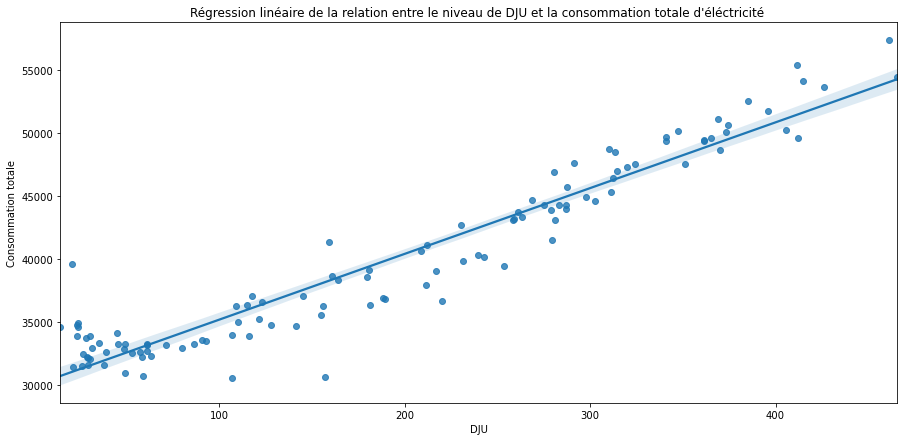

In [66]:
fig, ax = plt.subplots(figsize=(15,7))

ax = sns.regplot(x="DJU", y="Consommation totale", data=df)
plt.title("Régression linéaire de la relation entre le niveau de DJU et la consommation totale d'éléctricité ")

In [67]:
import statsmodels.formula.api as smf

In [68]:
reg = smf.ols('df.iloc[:,1]~DJU', data=df).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:          df.iloc[:, 1]   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     1182.
Date:                Thu, 25 Nov 2021   Prob (F-statistic):           2.40e-61
Time:                        13:23:57   Log-Likelihood:                -1033.0
No. Observations:                 114   AIC:                             2070.
Df Residuals:                     112   BIC:                             2075.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       3e+04    351.801     85.262      0.0

Les résultats du test de Durbin-Watson nous indique l'indépendance des résidus.

### Test de normalité des résidus

In [69]:
dfres = df

dfres['residus'] = reg.resid

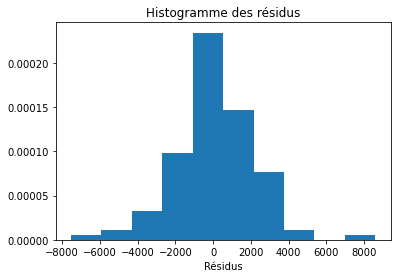

In [70]:
plt.hist(dfres['residus'], density=True)
plt.xlabel('Résidus')
plt.title('Histogramme des résidus')
plt.show()

L'allure de l'histogramme est assez classique : centrée et à peu près symétrique.

### Test d'homoscédasticité des résidus

In [71]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']

test = sms.het_breuschpagan(reg.resid, reg.model.exog)

lzip(names, test)

[('Lagrange multiplier statistic', 1.220492929310349),
 ('p-value', 0.26926393613781785),
 ('f-value', 1.2120571514564136),
 ('f p-value', 0.2732855699039977)]

L'hypothèse nulle d'homoscédascticité n'est pas rejetée. 

In [72]:
import scipy
import statsmodels.api as sm

In [73]:
var = sm.stats.anova_lm(reg)
var

,df,sum_sq,mean_sq,F,PR(>F)
DJU,1.0,5.230112e+09,5.230112e+09,1182.192944,2.398394e-61
Residual,112.0,4.954966e+08,4.424077e+06,NaN,NaN


Les conditions sont remplies pour valider la pertinence de la régression linéaire.

## Calcul de la correction de l'effet température

Afin de corriger les données de l'effet température nous allons déduire de la consommation observée la différence entre consommation théorique pour un dju donnée et la consommation théorique avec un dju égale à 0 ( consommation théorique avec le dju de réference à 18°)

In [74]:
print(reg.params)

Intercept    29995.375413
DJU             52.130776
dtype: float64


In [75]:
listcor = []

In [76]:
for y , x in zip(df['Consommation totale'],df['DJU']) :
    regval = 52.130776 * x + 29995.375413
    consoref = 29995.375413
    dif = regval - consoref
    z = y - dif
    listcor.append((x , z))

In [77]:
der2 = df

In [78]:
der2[['DJU2','Conso_corrigee']]=listcor

## Visualisation des données corrigées

Text(0, 0.5, 'Consommation en MW')

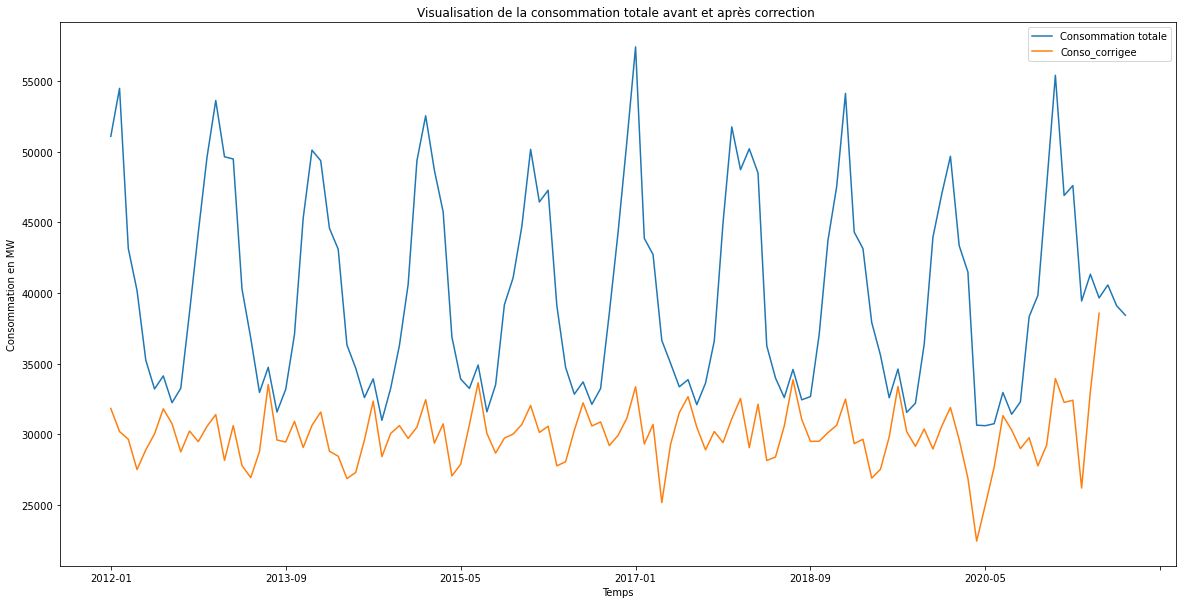

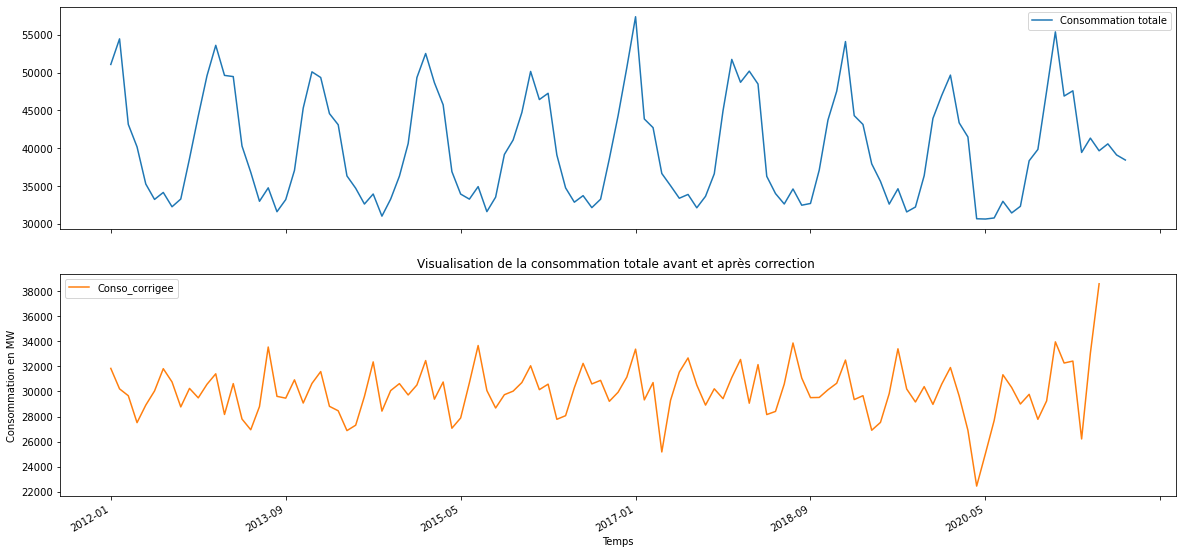

In [79]:
der2[['Consommation totale', 'Conso_corrigee']].plot(subplots=False, figsize=(20,10), )
plt.title("Visualisation de la consommation totale avant et après correction ")
plt.ylabel('Consommation en MW')
plt.xlabel('Temps')
der2[['Consommation totale', 'Conso_corrigee']].plot(subplots=True, figsize=(20,10) ,)
plt.title("Visualisation de la consommation totale avant et après correction ")
plt.xlabel('Temps')
plt.ylabel('Consommation en MW')

In [80]:
der3 = der2.dropna()

# Désaisonnalisation de la consommation

In [81]:
der3.index = pd.to_datetime(der3.index)

La fonction de décomposition nous permets de visualiser et d'isoler les 3 élements de notre série chronologique, à savoir la tendance , la saisonnalité et les résidus.

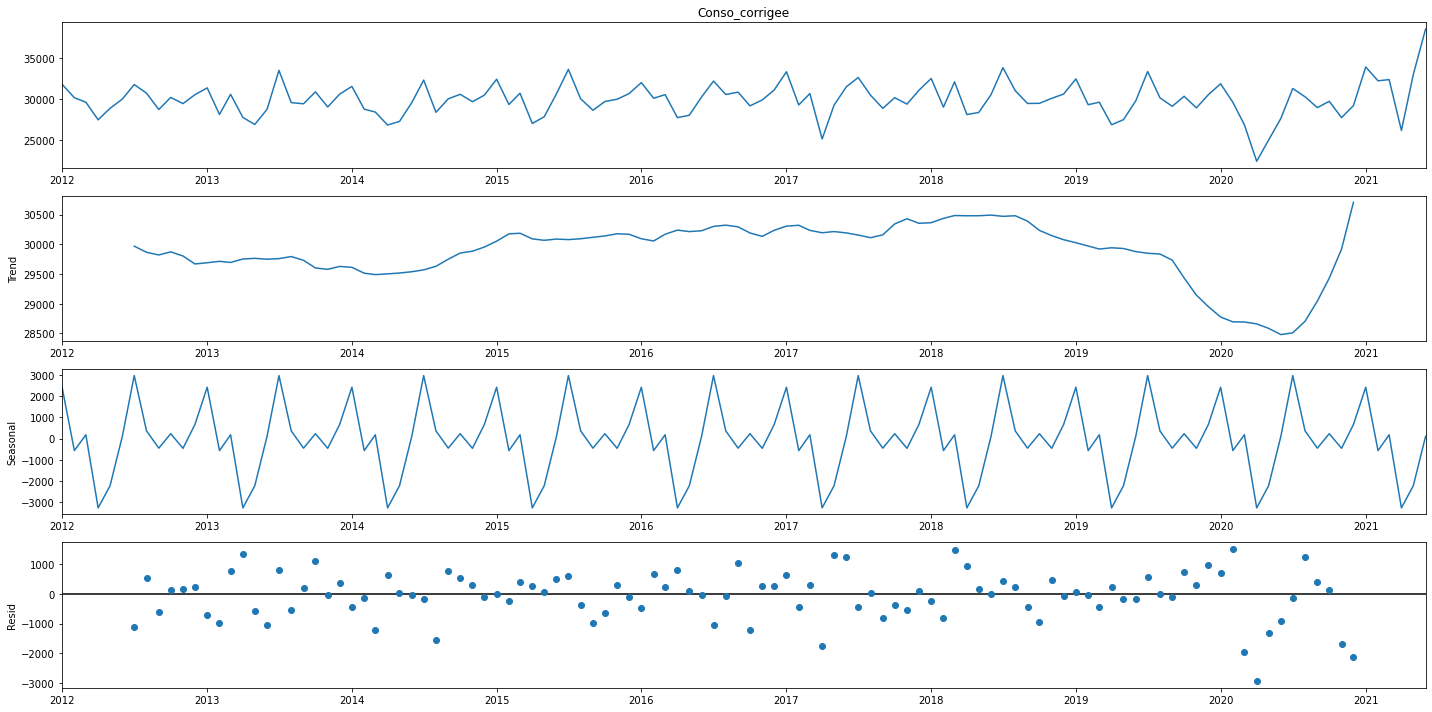

In [82]:
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose

rcParams['figure.figsize'] = 20, 10
decomp_x = seasonal_decompose(der3['Conso_corrigee'],  model='additive')
decomp_x.plot()
plt.show()

Nous ajoutons les données de la saisonnalité et de la tendance dans notre dataframe. 

In [83]:
seasonal = pd.DataFrame(decomp_x.seasonal)

In [84]:
trend = pd.DataFrame(decomp_x.trend)

In [85]:
der3 = der3.join(trend)
der3.head()

,Territoire,Consommation totale,DJU,residus,DJU2,Conso_corrigee,trend
Mois,,,,,,,
2012-01-01,France,51086,369.200000,1843.941930,369.200000,31839.317501,NaN
2012-02-01,France,54476,465.500000,213.748160,465.500000,30209.123772,NaN
2012-03-01,France,43156,258.833333,-332.558045,258.833333,29662.817479,NaN
2012-04-01,France,40176,242.833333,-2478.465622,242.833333,27516.909895,NaN
2012-05-01,France,35257,121.657143,-1080.456728,121.657143,28914.918737,NaN


In [86]:
der3 = der3.join(seasonal)
der3.head()

,Territoire,Consommation totale,DJU,residus,DJU2,Conso_corrigee,trend,seasonal
Mois,,,,,,,,
2012-01-01,France,51086,369.200000,1843.941930,369.200000,31839.317501,NaN,2425.308030
2012-02-01,France,54476,465.500000,213.748160,465.500000,30209.123772,NaN,-562.872666
2012-03-01,France,43156,258.833333,-332.558045,258.833333,29662.817479,NaN,182.266331
2012-04-01,France,40176,242.833333,-2478.465622,242.833333,27516.909895,NaN,-3265.871639
2012-05-01,France,35257,121.657143,-1080.456728,121.657143,28914.918737,NaN,-2222.268642


In [87]:
der3.shape

(114, 8)

## Visualisation de la tendance de la consommation corrigée. 

Text(0, 0.5, 'Consommation en MW')

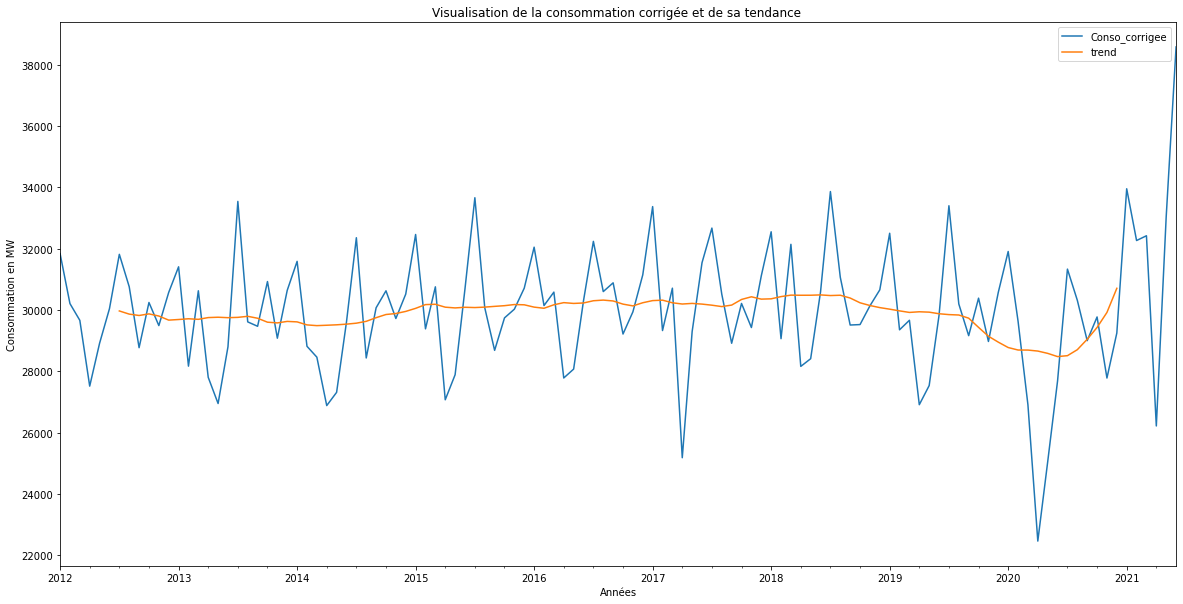

In [88]:
der3[['Conso_corrigee', 'trend']].plot(subplots=False, figsize=(20,10))
plt.title("Visualisation de la consommation corrigée et de sa tendance ")
plt.xlabel('Années')
plt.ylabel('Consommation en MW')

# Création, choix et évaluation de modèles prédictifs de la consommation d'éléctricité. 

Afin de faire une prévision de la consommation d'éléctricité pour les prochains mois nous allons créer deux sortes de modèles, le modèle de Holt-Winters et le modèle Sarima. Dans le modèle Sarima le choix des 7 paramètres est très important. Ces paramètres seront pensés de manière empirique dans un premier temps puis déterminés en Grid search et avec la fonction Auto arima dans un deuxième et troisième temps. 

## Méthode de Holt-Winters

### Création du modèle

In [89]:
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.stats.diagnostic import acorr_ljungbox

hw = ExponentialSmoothing(np.asarray(der3['Conso_corrigee']), seasonal_periods=12, trend='add', seasonal='add').fit()
hw_pred = hw.forecast(12)

print(hw.summary())

print('Retard : p-value')
for elt in [6, 12, 18, 24, 30, 36]:
    print('{} : {}'.format(elt, acorr_ljungbox(hw.resid, lags=elt).mean()))

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                  114
Model:             ExponentialSmoothing   SSE                      170610677.455
Optimized:                         True   AIC                           1652.931
Trend:                         Additive   BIC                           1696.711
Seasonal:                      Additive   AICC                          1660.131
Seasonal Periods:                    12   Date:                 Thu, 25 Nov 2021
Box-Cox:                          False   Time:                         13:24:15
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.3453505                alpha                 True
smoothing_trend          

C:\Users\useal\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Les tests de significativité des paramètres et de blancheur du résidu sont validés au niveau 5%.

### Test de normalité des résidus du modèle Holt-Winters

In [90]:
from scipy.stats import shapiro

shapiro(hw.resid)

ShapiroResult(statistic=0.9683868885040283, pvalue=0.008448013104498386)

### Visualisation des résidus

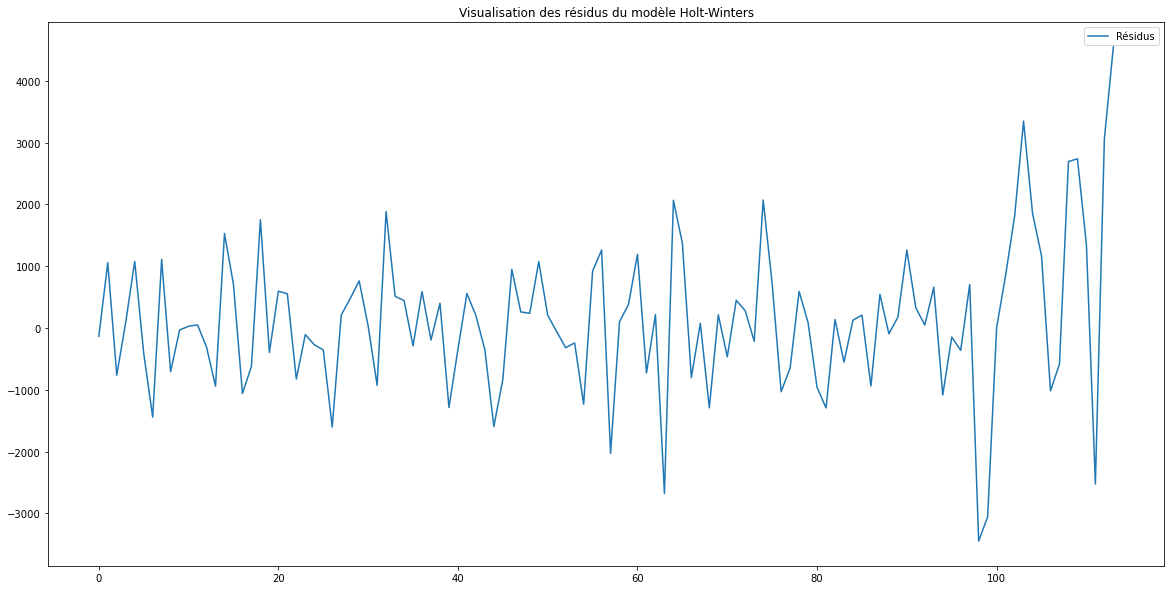

In [91]:
plt.figure(figsize=(20,10))
plt.plot(hw.resid, label='Résidus')
plt.title("Visualisation des résidus du modèle Holt-Winters")
plt.legend()
plt.show()

### Analyse à postériori

In [92]:
ax = der3

ax_tronc = ax[:'2020']
ax_a_prevoir = ax['2020']

In [93]:
amodel2tronc = ExponentialSmoothing(np.asarray(ax_tronc['Conso_corrigee']), seasonal_periods=12, trend='add', seasonal='add')
aresults2tronc = amodel2tronc.fit()

On vérifie que le modèle sur la série tronquée est toujours validé.

In [94]:
print(aresults2tronc.summary())

print('Retard : p-value')
for elt in [6, 12, 18, 24, 30, 36]:
    print('{} : {}'.format(elt, acorr_ljungbox(aresults2tronc.resid, lags=elt).mean()))
    
shapiro(aresults2tronc.resid)

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                  108
Model:             ExponentialSmoothing   SSE                       89321632.923
Optimized:                         True   AIC                           1503.567
Trend:                         Additive   BIC                           1546.481
Seasonal:                      Additive   AICC                          1511.253
Seasonal Periods:                    12   Date:                 Thu, 25 Nov 2021
Box-Cox:                          False   Time:                         13:24:20
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.1899641                alpha                 True
smoothing_trend          

ShapiroResult(statistic=0.9233220219612122, pvalue=1.0473069778527133e-05)

Le modèle tronqué est lui aussi valide. 

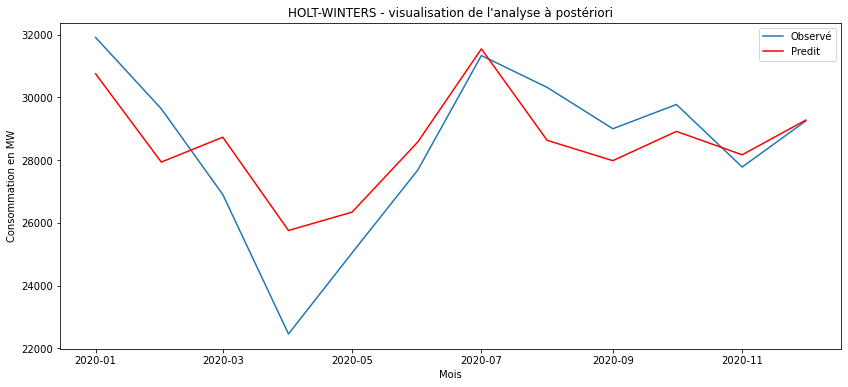

In [95]:
apred_model2tronc = aresults2tronc.forecast(12)
apred_tronc = apred_model2tronc

plt.figure(figsize=(14,6))
plt.plot(ax_a_prevoir['Conso_corrigee'], label='Observé')
plt.plot(ax_a_prevoir.index, apred_tronc, color='r', label='Predit')
plt.title("HOLT-WINTERS - visualisation de l'analyse à postériori")
plt.xlabel('Mois')
plt.ylabel('Consommation en MW')
plt.legend()
plt.show()

The commonly used accuracy metrics to judge forecasts are:

1/ Mean Absolute Percentage Error (MAPE)

2/ Mean Error (ME)

3/ Mean Absolute Error (MAE)

4/ Mean Percentage Error (MPE)

5/ Root Mean Squared Error (RMSE)

6/ Lag 1 Autocorrelation of Error (ACF1)

7/ Correlation between the Actual and the Forecast (corr)

8/ Min-Max Error (minmax)

source :(https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/#11accuracymetricsfortimeseriesforecast)

In [96]:
from statsmodels.tsa.stattools import acf, pacf

In [97]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))*100  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(forecast-actual)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})


In [98]:
forecast_accuracy(apred_tronc, ax_a_prevoir['Conso_corrigee'])

<ipython-input-97-c7ec4be5387f>:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)
<ipython-input-97-c7ec4be5387f>:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)


{'mape': 4.444639391233443,
 'me': 127.2880778298304,
 'mae': 1196.2354245423687,
 'mpe': 0.008950663487287435,
 'rmse': 1463.7354752964184,
 'acf1': 0.47260735860437464,
 'corr': 0.8646985311834322,
 'minmax': 0.04220504155561955}

### Visualition de la prévision avec le modèle Holt-Winters

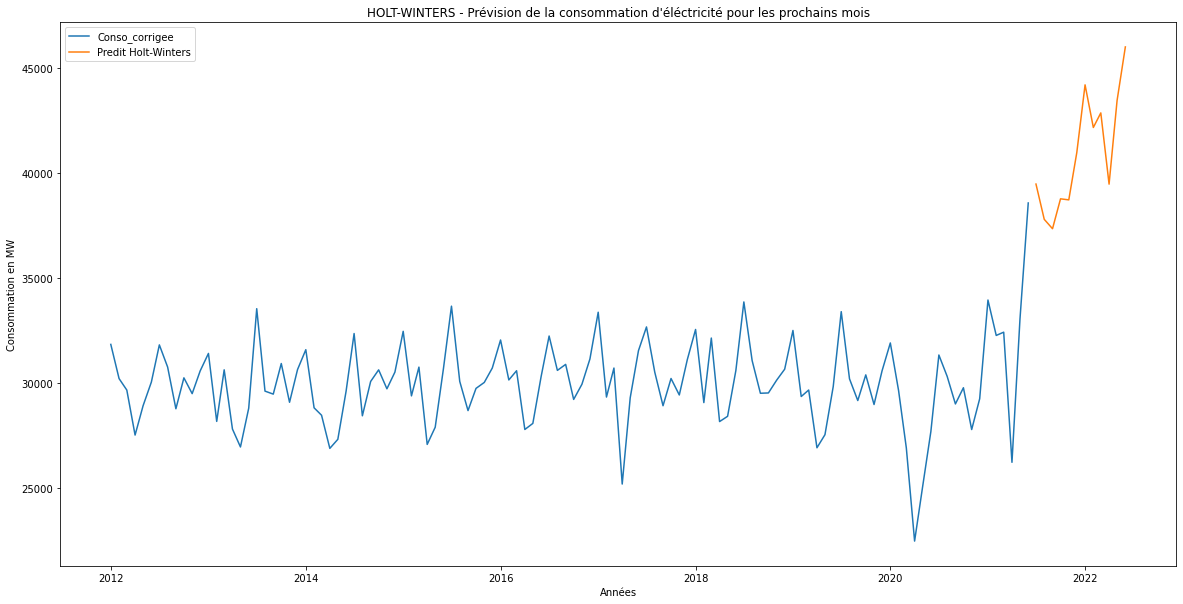

In [99]:
plt.figure(figsize=(20,10))
plt.plot(der3['Conso_corrigee'], label='Conso_corrigee')
plt.plot(pd.date_range(der3.index[len(der3)-1], periods=12, freq='M'), hw_pred, label='Predit Holt-Winters')
plt.title("HOLT-WINTERS - Prévision de la consommation d'éléctricité pour les prochains mois")
plt.xlabel('Années')
plt.ylabel('Consommation en MW')
plt.legend()
plt.show()

## Sarima 


### Etude de la stationnarité de la conso corrigée

H0, la série est non stationnaire , seuil à 5%

In [100]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(der3['Conso_corrigee'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.643613
p-value: 0.084314


H0 ne peut etre rejeté

L'hypothèse H0 selon laquelle la serie est non stationnaire ne peut être rejetée, donc on ne peut pas dire que la série est stationnaire.

C:\Users\useal\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


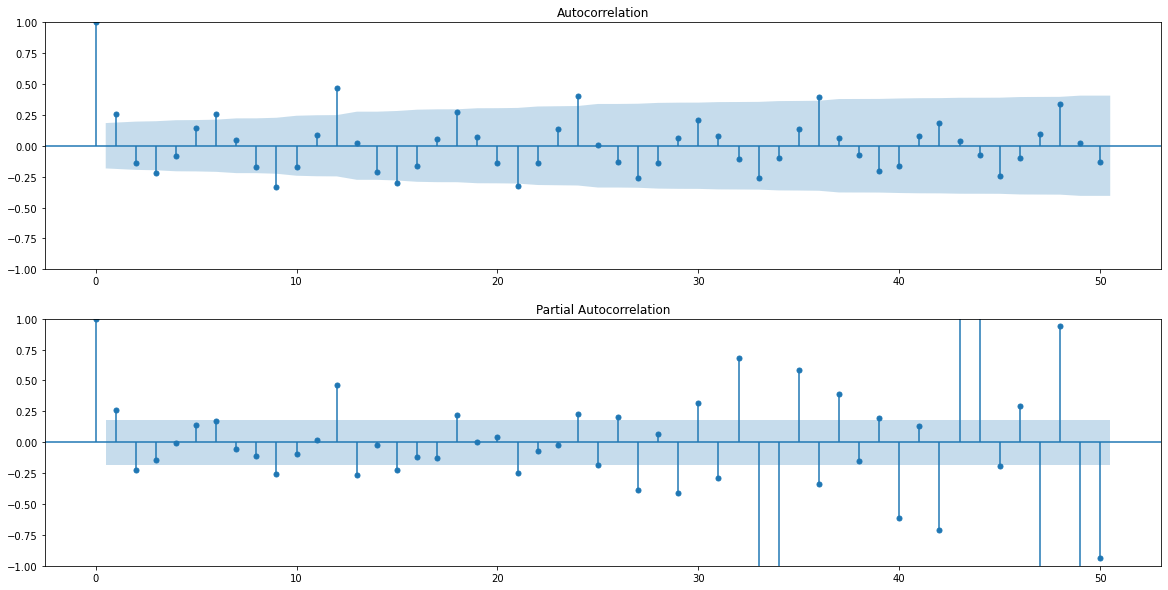

In [101]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

train = der3['Conso_corrigee']

fig, ax = plt.subplots(2,1)
fig = sm.graphics.tsa.plot_acf(train, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(train, lags=50, ax=ax[1])
plt.show()

#### Première différenciation basé sur une observation de période de 12

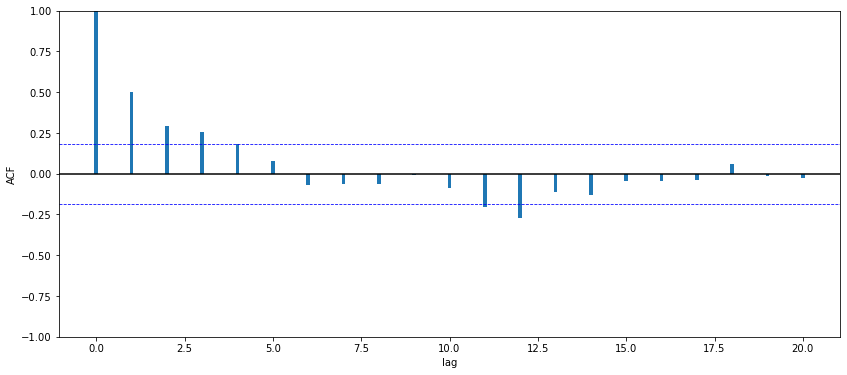

In [102]:
from statsmodels.tsa.stattools import acf, pacf
from functions import plot_sortie_acf

train_dif12 = train - train.shift(12)

train_len = len(train)

plot_sortie_acf(acf(np.asarray(train_dif12[12:])), train_len)

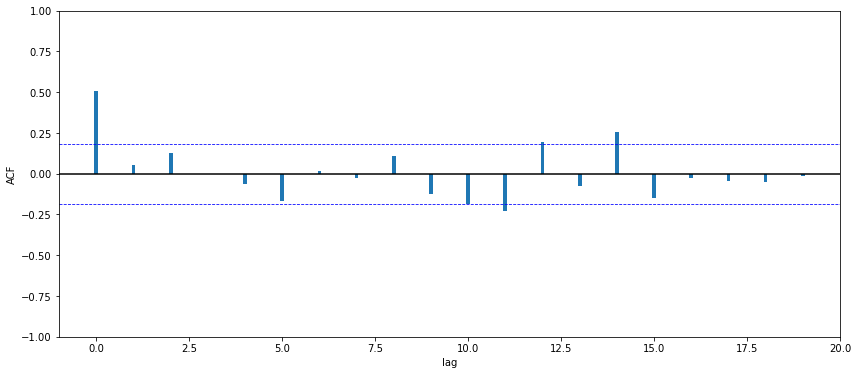

In [103]:
plot_sortie_acf(pacf(np.asarray(train_dif12[12:])), train_len, pacf=True)

#### Deuxiéme différenciation pour atteindre la stationnarité

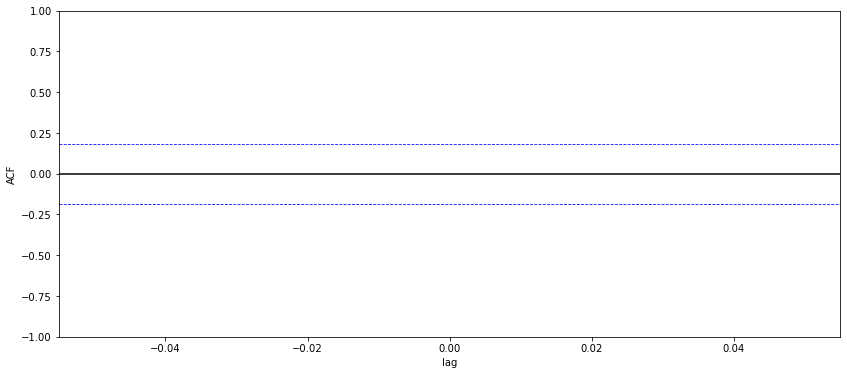

In [104]:
train_dif122 = train_dif12 - train_dif12.shift(1)

plot_sortie_acf(acf(np.asarray(train_dif122[1:])), train_len)


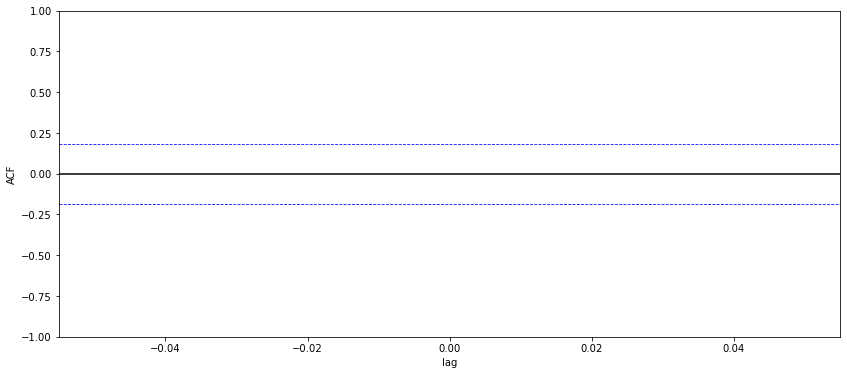

In [105]:
plot_sortie_acf(pacf(np.asarray(train_dif122[1:])), train_len, pacf=True)

In [106]:
import itertools 

### Recherche des meilleures paramètres pour le sarima

#### Modèle en Grid Search (modèle 1)

In [107]:
import warnings

p = range(0, 3)
d = range(0,2)
q = range(0, 3)

pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

warnings.filterwarnings("ignore") # pour éviter les messages " warnings"

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=True,
                                            enforce_invertibility=True)
            results = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic) )
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:2676.4734388250877
ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:2615.419462201259
ARIMA(0, 0, 0)x(0, 0, 2, 12) - AIC:2601.2638260639865
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:1835.384653547514
ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:1838.6511331172105
ARIMA(0, 0, 0)x(0, 1, 2, 12) - AIC:2059.998397663995
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:2119.272431955354
ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:2094.8201361366987
ARIMA(0, 0, 0)x(1, 0, 2, 12) - AIC:2126.2381138688575
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:1837.501866934398
ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:1838.094740184003
ARIMA(0, 0, 0)x(1, 1, 2, 12) - AIC:2103.0246527676527
ARIMA(0, 0, 0)x(2, 0, 0, 12) - AIC:2101.7319689735477
ARIMA(0, 0, 0)x(2, 0, 1, 12) - AIC:2092.601468021741
ARIMA(0, 0, 0)x(2, 0, 2, 12) - AIC:2115.951485465372
ARIMA(0, 0, 0)x(2, 1, 0, 12) - AIC:1840.8812302367555
ARIMA(0, 0, 0)x(2, 1, 1, 12) - AIC:1833.9526813107027
ARIMA(0, 0, 0)x(2, 1, 2, 12) - AIC:1852.9005305765722
ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:2

ARIMA(1, 0, 2)x(1, 1, 2, 12) - AIC:1823.6301625156327
ARIMA(1, 0, 2)x(2, 0, 0, 12) - AIC:2002.168032180633
ARIMA(1, 0, 2)x(2, 0, 1, 12) - AIC:2030.7389029433207
ARIMA(1, 0, 2)x(2, 0, 2, 12) - AIC:2033.1241008628488
ARIMA(1, 0, 2)x(2, 1, 0, 12) - AIC:1824.7755462201362
ARIMA(1, 0, 2)x(2, 1, 1, 12) - AIC:1821.193560148432
ARIMA(1, 0, 2)x(2, 1, 2, 12) - AIC:1827.399144641522
ARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:2081.3964309210205
ARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:2063.347551256856
ARIMA(1, 1, 0)x(0, 0, 2, 12) - AIC:2059.578627337238
ARIMA(1, 1, 0)x(0, 1, 0, 12) - AIC:1781.7132503808136
ARIMA(1, 1, 0)x(0, 1, 1, 12) - AIC:1777.3855228431319
ARIMA(1, 1, 0)x(0, 1, 2, 12) - AIC:1774.9546047887868
ARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:2050.4992914302547
ARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:2025.1024682026564
ARIMA(1, 1, 0)x(1, 0, 2, 12) - AIC:2026.9685343851665
ARIMA(1, 1, 0)x(1, 1, 0, 12) - AIC:1778.9567332205681
ARIMA(1, 1, 0)x(1, 1, 1, 12) - AIC:1775.0363561745878
ARIMA(1, 1, 0)x(1, 1, 2, 12) - AI

ARIMA(2, 1, 2)x(0, 1, 1, 12) - AIC:1773.57691620774
ARIMA(2, 1, 2)x(0, 1, 2, 12) - AIC:1773.3088791930577
ARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:2045.9139359464082
ARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:2031.0289770522877
ARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:2033.0258357434195
ARIMA(2, 1, 2)x(1, 1, 0, 12) - AIC:1776.507824930114
ARIMA(2, 1, 2)x(1, 1, 1, 12) - AIC:1771.8021824741015
ARIMA(2, 1, 2)x(1, 1, 2, 12) - AIC:1774.5531400576544
ARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:2042.1708041470185
ARIMA(2, 1, 2)x(2, 0, 1, 12) - AIC:2032.810450327838
ARIMA(2, 1, 2)x(2, 0, 2, 12) - AIC:2034.806069229749
ARIMA(2, 1, 2)x(2, 1, 0, 12) - AIC:1775.632432376879
ARIMA(2, 1, 2)x(2, 1, 1, 12) - AIC:1774.417857109615
ARIMA(2, 1, 2)x(2, 1, 2, 12) - AIC:1776.0080206838068


Meilleur modèle :

ARIMA(1, 1, 2)x(0, 1, 2, 12) - AIC:1770.2745161242735

#### Etude du modèle trouvé en Grid search

In [108]:
from statsmodels.tsa.statespace.sarimax import *
from statsmodels.stats.diagnostic import acorr_ljungbox

model2 = SARIMAX(np.asarray(der3['Conso_corrigee']), order=(1,1,2), seasonal_order=(0,1,2,12))
results2 = model2.fit()
print(results2.summary())

print('Retard : p-value')
for elt in [6, 12, 18, 24, 30, 36]:
    print('{} : {}'.format(elt, acorr_ljungbox(results2.resid, lags=elt).mean()))

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  114
Model:             SARIMAX(1, 1, 2)x(0, 1, 2, 12)   Log Likelihood                -879.137
Date:                            Thu, 25 Nov 2021   AIC                           1770.275
Time:                                    13:27:43   BIC                           1785.965
Sample:                                         0   HQIC                          1776.627
                                            - 114                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8442      0.068    -12.503      0.000      -0.977      -0.712
ma.L1          0.8270      0.270   

Les tests de significativité des paramètres et de blancheur du résidu sont validés au niveau 5%.

##### Test de normalité des résidus du modèle 1

In [109]:
from scipy.stats import shapiro

shapiro(results2.resid)

ShapiroResult(statistic=0.4693240523338318, pvalue=1.7995909796132155e-18)

Le test de normalité est validé pour ce modèle.

#### Visualisation des résidus 

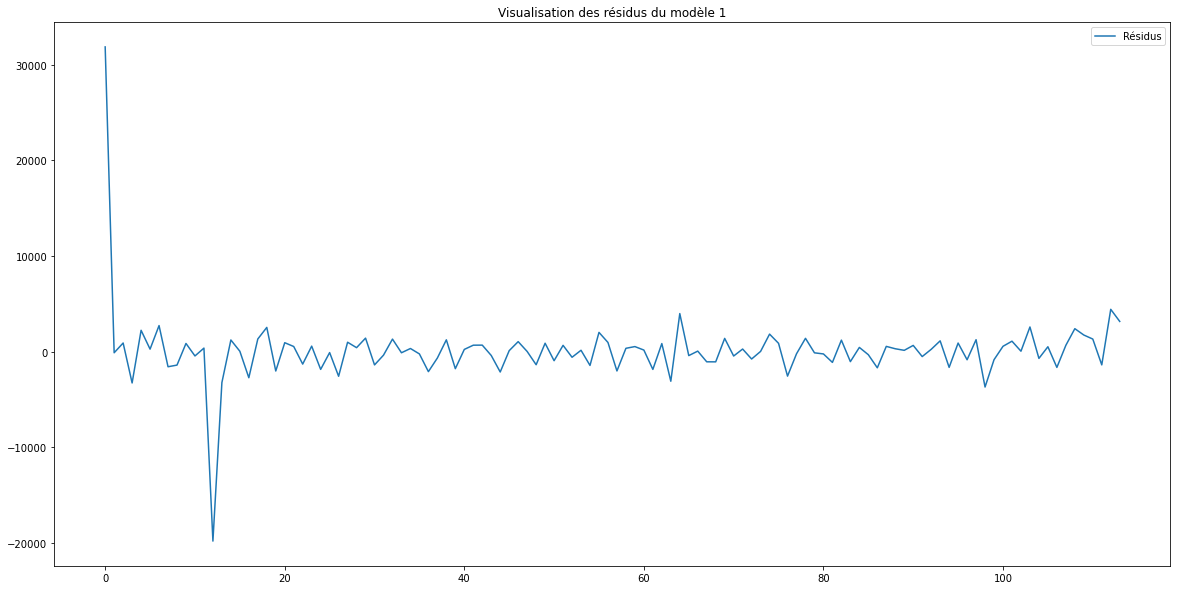

In [110]:
plt.figure(figsize=(20,10))
plt.plot(results2.resid, label='Résidus')
plt.title("Visualisation des résidus du modèle 1")
plt.legend()
plt.show()

In [111]:
#pip install pmdarima --user

In [112]:
import pmdarima as pm

In [113]:
from pmdarima import auto_arima

#### Application de l'auto arima (modèle 2)

In [114]:
arima_model = auto_arima(train, start_p = 0 , start_q = 0 , max_p = 4 , max_q = 4 , start_P = 0 , start_Q = 0 , max_P = 4 , max_Q = 4 , m = 12 , seasonal=True , trace = True , d=1 , D=1 , error_action = 'warn' , suppress_warning = True , stepwise = True , random_state = 20 , n_fits = 30)
#arima_model.summary()

print(arima_model.aic())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1781.139, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1778.957, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1777.015, Time=0.07 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1781.598, Time=0.02 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1774.509, Time=0.18 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1778.660, Time=0.06 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=1776.005, Time=0.50 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=1776.053, Time=0.53 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1774.437, Time=0.20 sec
 ARIMA(0,1,1)(0,1,3)[12]             : AIC=1776.062, Time=0.52 sec
 ARIMA(0,1,1)(1,1,3)[12]             : AIC=1778.031, Time=1.05 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=1773.618, Time=0.28 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1776.568, Time=0.17 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=1775.175, Time=0.44 sec
 ARIMA(0,1,0)(0,1,3

#### Etude du modèle trouvé avec auto arima

In [115]:
model3 = SARIMAX(np.asarray(der3['Conso_corrigee']), order=(0,1,0), seasonal_order=(0,1,2,12))
results3 = model3.fit()
print(results3.summary())

print('Retard : p-value')
for elt in [6, 12, 18, 24, 30, 36]:
    print('{} : {}'.format(elt, acorr_ljungbox(results3.resid, lags=elt).mean()))

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  114
Model:             SARIMAX(0, 1, 0)x(0, 1, [1, 2], 12)   Log Likelihood                -883.809
Date:                                 Thu, 25 Nov 2021   AIC                           1773.618
Time:                                         13:30:27   BIC                           1781.464
Sample:                                              0   HQIC                          1776.795
                                                 - 114                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.3139      0.081     -3.864      0.000      -0.473      -0

Les tests de significativité des paramètres et de blancheur du résidu sont validés au niveau 5%.

#### Test de normalité des résidus du modèle 2

In [116]:
shapiro(results3.resid)

ShapiroResult(statistic=0.4801003336906433, pvalue=2.6913102915091618e-18)

Le test de normalité est validé pour ce modèle.

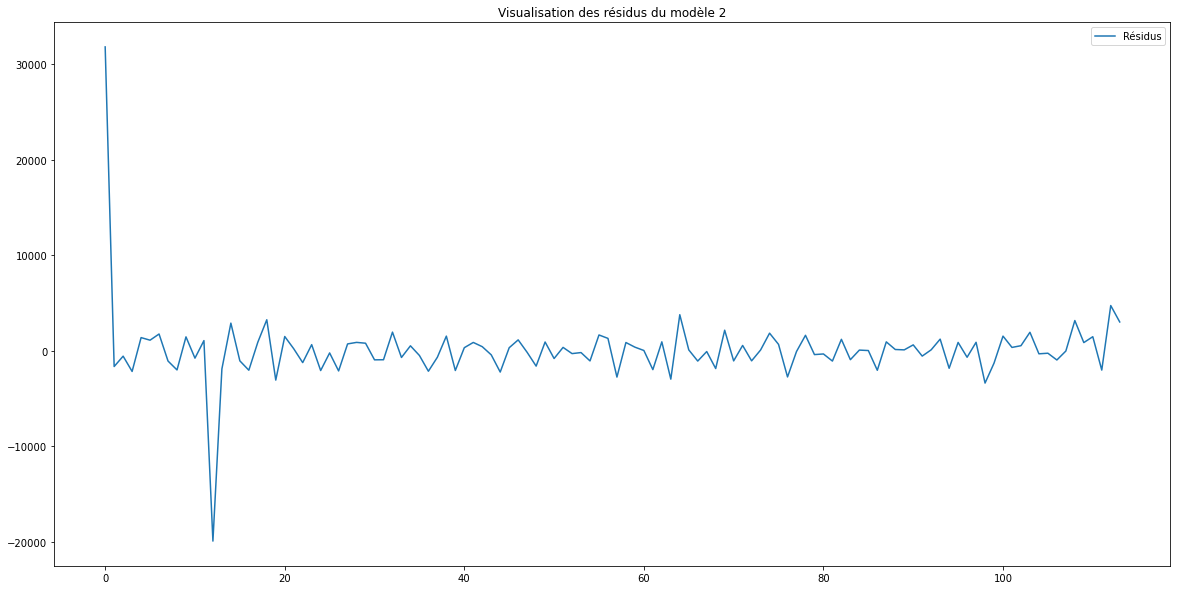

In [117]:
plt.figure(figsize=(20,10))
plt.plot(results3.resid, label='Résidus')
plt.title("Visualisation des résidus du modèle 2")
plt.legend()
plt.show()

Les 2 modèles sont validés mais nous garderons le 1er modèle car son AIC est plus faible.

### Evaluation du modèle séléctionné

Lorsque nous appliquons un modèle Sarima (ou tout autre modèle du genre), il est important de lancer un diagnostique du modèle pour s'assurer qu'aucune des conditions n'ont été enfreintes. La fonction plot_diagnostics nous permet de générer rapidement un diagnostique du modèle et d'identifier de potentiels caractéristiques inhabituelles.

source ( https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-arima-in-python-3 )

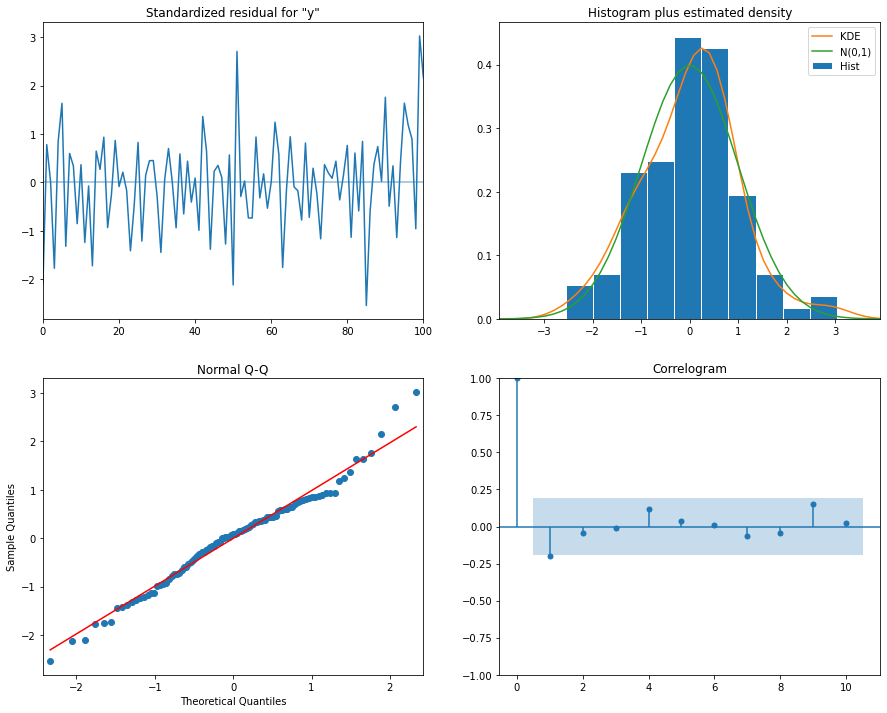

In [118]:
results2.plot_diagnostics(figsize=(15, 12))
plt.show()

### Analyse a posteriori

In [119]:
x = der3

x_tronc = x[:'2020']
# y_tronc = np.log(x_tronc)
x_a_prevoir = x['2020']

On vérifie que le modèle sur la série tronquée est toujours validé.

In [120]:
model2tronc = SARIMAX(np.asarray(x_tronc['Conso_corrigee']), order=(1,1,2), seasonal_order=(0,1,2,12))
results2tronc = model2tronc.fit()
print(results2tronc.summary())

print('Retard : p-value')
for elt in [6, 12, 18, 24, 30, 36]:
    print('{} : {}'.format(elt, acorr_ljungbox(results2tronc.resid, lags=elt).mean()))
    
shapiro(results2tronc.resid)

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  108
Model:             SARIMAX(1, 1, 2)x(0, 1, 2, 12)   Log Likelihood                -817.913
Date:                            Thu, 25 Nov 2021   AIC                           1647.826
Time:                                    13:30:42   BIC                           1663.149
Sample:                                         0   HQIC                          1654.017
                                            - 108                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7277      0.242     -3.013      0.003      -1.201      -0.254
ma.L1          0.6042      0.276   

ShapiroResult(statistic=0.44033586978912354, pvalue=1.9339029840104414e-18)

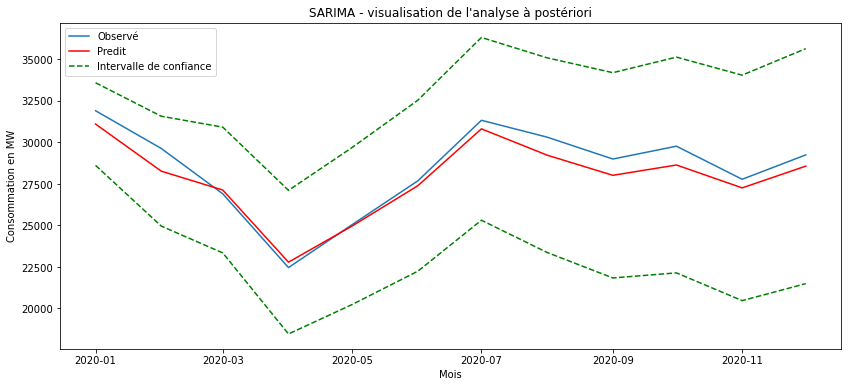

In [121]:
pred_model2tronc = results2tronc.get_forecast(12)
pred_tronc = pred_model2tronc.predicted_mean
pred_l_tronc = [(elt[0]) for elt in pred_model2tronc.conf_int(alpha=0.05)]
pred_u_tronc = [(elt[1]) for elt in pred_model2tronc.conf_int(alpha=0.05)]

plt.figure(figsize=(14,6))
plt.plot(x_a_prevoir['Conso_corrigee'], label='Observé')
plt.plot(x_a_prevoir.index, pred_tronc, color='r', label='Predit')
plt.plot(x_a_prevoir.index, pred_l_tronc, color='g', linestyle='--' , label='Intervalle de confiance')
plt.plot(x_a_prevoir.index, pred_u_tronc, color='g', linestyle='--')
plt.title("SARIMA - visualisation de l'analyse à postériori")
plt.xlabel('Mois')
plt.ylabel('Consommation en MW')
plt.legend()
plt.show()

On calcule les RMSE et MAPE.

In [122]:
rmse = np.sqrt(((x_a_prevoir['Conso_corrigee']-pred_tronc)**2).mean())
rmse

773.4196222337698

In [123]:
mape=(np.abs(1-pred_tronc/x_a_prevoir['Conso_corrigee'])).mean()*100
mape

2.2837496135604205

In [124]:
forecast_accuracy(pred_tronc, x_a_prevoir['Conso_corrigee'])

{'mape': 2.2837496135604223,
 'me': -575.1570873560455,
 'mae': 667.3705162440316,
 'mpe': -0.01901070510375836,
 'rmse': 773.4196222337698,
 'acf1': 0.38402470630132557,
 'corr': 0.9882831150703018,
 'minmax': 0.022814295899695747}

### Visualisation de la prévision

#### Méthode 1

In [125]:
model4 = SARIMAX(np.asarray(der3['Conso_corrigee']), order=(1,1,2), seasonal_order=(0,1,2,12))
results4 = model4.fit()

n_periods = 12

fitted, confint = arima_model.predict(n_periods=n_periods, return_conf_int=True)

index_of_fc = pd.date_range(der3.index[-1], periods = n_periods, freq='MS')


fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

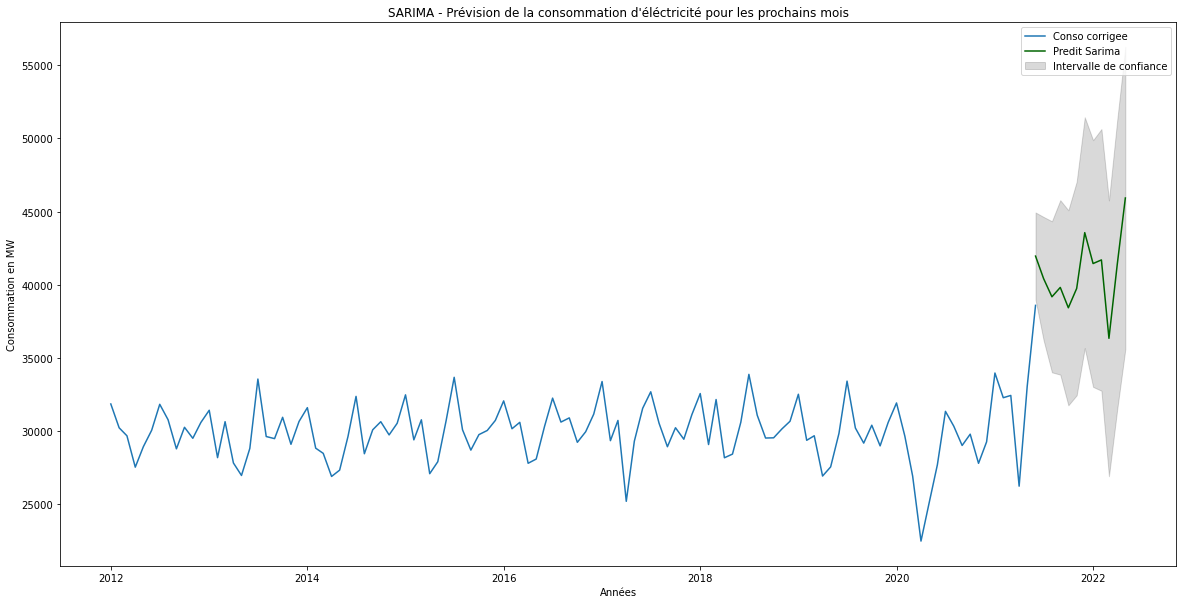

In [126]:
plt.plot(der3['Conso_corrigee'], label='Conso corrigee')
plt.plot(fitted_series, color='darkgreen', label='Predit Sarima')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15 , label='Intervalle de confiance')

plt.title("SARIMA - Prévision de la consommation d'éléctricité pour les prochains mois")
plt.xlabel('Années')
plt.ylabel('Consommation en MW')
plt.legend()
plt.show()

#### Méthode 2

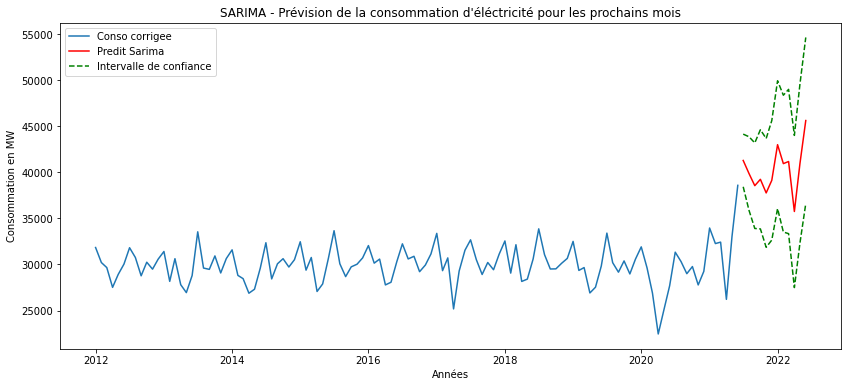

In [127]:
pred_model2 = results2.get_forecast(12)
pred = pred_model2.predicted_mean
pred_l = [(elt[0]) for elt in pred_model2.conf_int(alpha=0.05)]
pred_u = [(elt[1]) for elt in pred_model2.conf_int(alpha=0.05)]

plt.figure(figsize=(14,6))
plt.plot(der3['Conso_corrigee'], label='Conso corrigee')
plt.plot(pd.date_range(x.index[len(x)-1], periods=12, freq='M'), pred, color='r', label='Predit Sarima')
plt.plot(pd.date_range(x.index[len(x)-1], periods=12, freq='M'), pred_l, color='g', linestyle='--' , label='Intervalle de confiance')
plt.plot(pd.date_range(x.index[len(x)-1], periods=12, freq='M'), pred_u, color='g', linestyle='--')
plt.title("SARIMA - Prévision de la consommation d'éléctricité pour les prochains mois")
plt.xlabel('Années')
plt.ylabel('Consommation en MW')
plt.legend()
plt.show()

## Comparaison des modèles Sarima et Holt-Winters

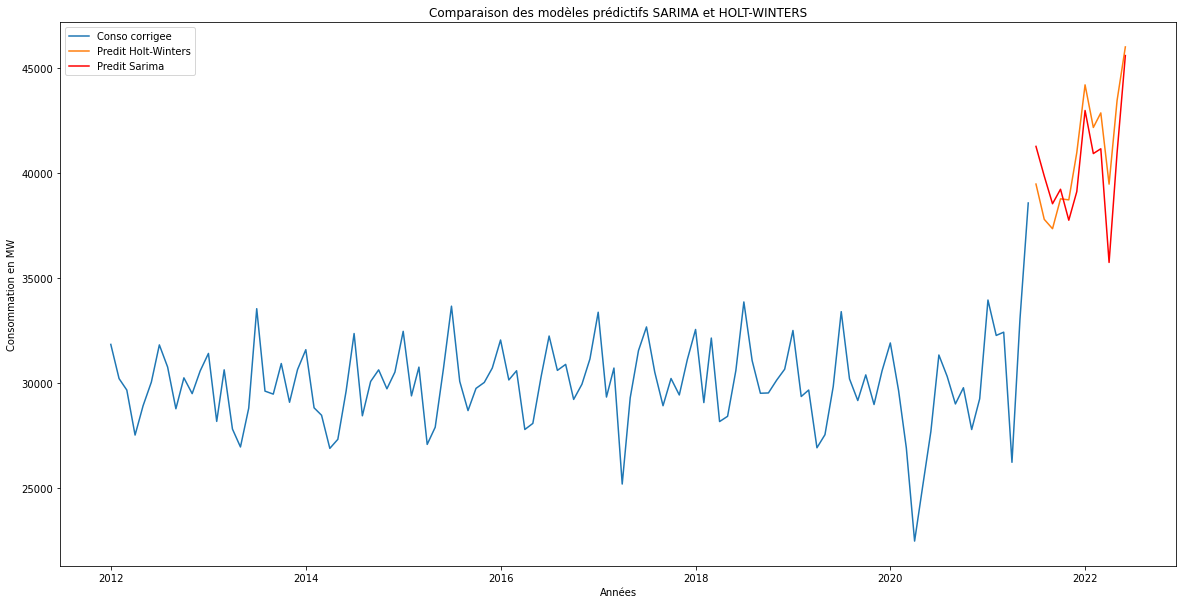

In [128]:
plt.figure(figsize=(20,10))
plt.plot(der3['Conso_corrigee'], label='Conso corrigee')
plt.plot(pd.date_range(der3.index[len(der3)-1], periods=12, freq='M'), hw_pred, label='Predit Holt-Winters')
plt.plot(pd.date_range(x.index[len(x)-1], periods=12, freq='M'), pred, color='r', label='Predit Sarima')
plt.title("Comparaison des modèles prédictifs SARIMA et HOLT-WINTERS")
plt.xlabel('Années')
plt.ylabel('Consommation en MW')
plt.legend()
plt.show()